## Included in this Script

1. Import libraries & Data 
2. Data Cleaning & Checks
3. The elbow Techniques 
4. K-means Clustering 

### 1. Importing libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'/Users/biancaskyehoney/Documents/World Happiness Report /02 Data /Prepared Data'

In [8]:
df = pd.read_csv(os.path.join(path, 'df.csv'),index_col = 0)

In [9]:
df.shape

(782, 11)

In [10]:
df.head()

,Country,Region,Rank,Score,GDP,Life Expectancy,Freedom,Corruption,Generosity,year,GDP Level
0,Switzerland,Western Europe,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015,Mid-Range GDP
1,Iceland,Western Europe,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015,Mid-Range GDP
2,Denmark,Western Europe,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015,Mid-Range GDP
3,Norway,Western Europe,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015,Mid-Range GDP
4,Canada,North America,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015,Mid-Range GDP


No need to re-name columns
We do need to remove country, region and gdp level columns as these are categorical values/names

In [14]:
# Remove columns 'B' and 'C'
columns_to_remove = ['Country', 'Region','GDP Level']
df_cluster = df.drop(columns=columns_to_remove)


In [15]:
df_cluster.head()

,Rank,Score,GDP,Life Expectancy,Freedom,Corruption,Generosity,year
0,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015


### 2. The elbow technique

In [18]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [19]:
score = [kmeans[i].fit(df_cluster).score(df_cluster) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/biancaskyehoney/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/biancaskyehoney/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/biancaskyehoney/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/biancaskyehoney/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

[-1597148.9704063898,
 -400652.5962611687,
 -179103.73261695885,
 -101523.50652888359,
 -65621.46623017282,
 -46265.0710622014,
 -34287.64581032086,
 -26839.480359948473,
 -21488.164978960504]

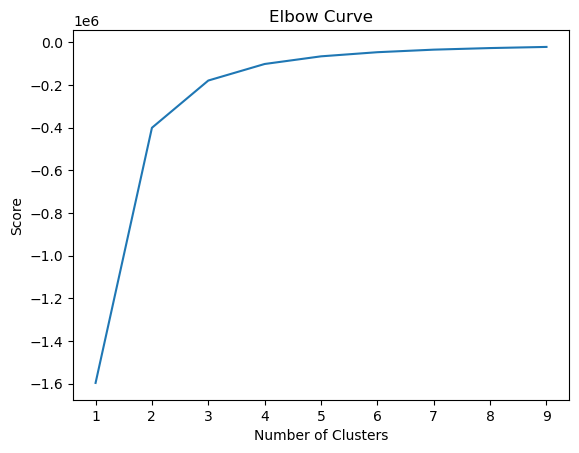

In [20]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Elbow cluster shows straightening out at 3 

### 3. K-mean clustering

In [21]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [23]:
# Fit the k-means object to the data.

kmeans.fit(df_cluster)

/Users/biancaskyehoney/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [27]:
df_cluster['clusters'] = kmeans.fit_predict(df_cluster)

/Users/biancaskyehoney/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
df_cluster.head()

,Rank,Score,GDP,Life Expectancy,Freedom,Corruption,Generosity,year,clusters
0,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015,1
1,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015,1
2,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015,1
3,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015,1
4,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015,1


In [29]:
df_cluster['clusters'].value_counts()

1    265
2    260
0    257
Name: clusters, dtype: int64

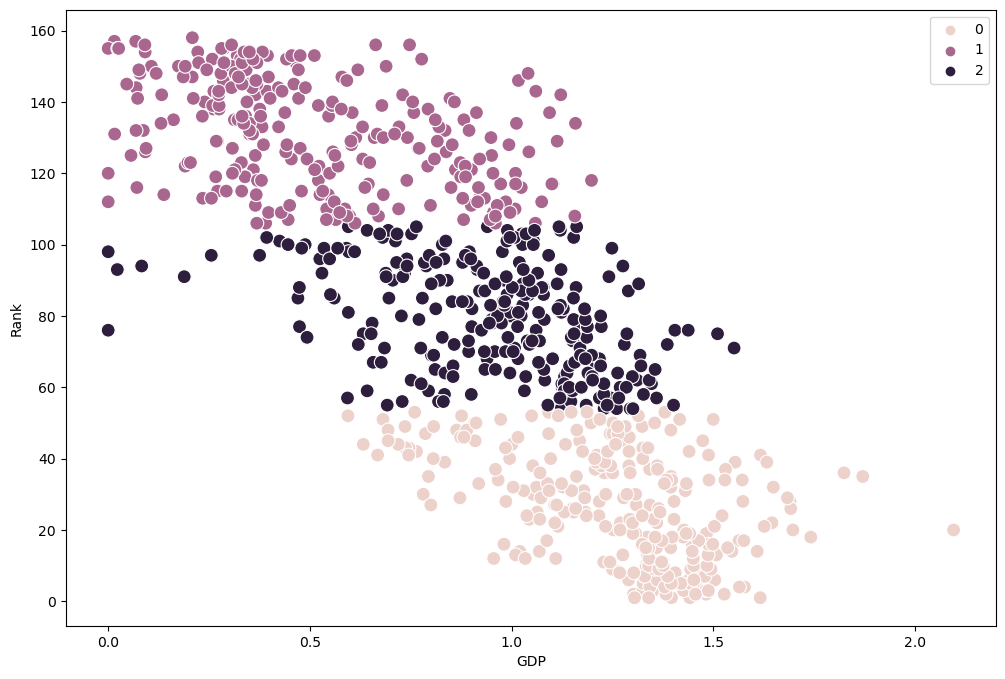

In [24]:
# Plot the clusters for the "Score" and "GDP" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['GDP'], y=df['Rank'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP') # Label x-axis.
plt.ylabel('Rank') # Label y-axis.
plt.show()

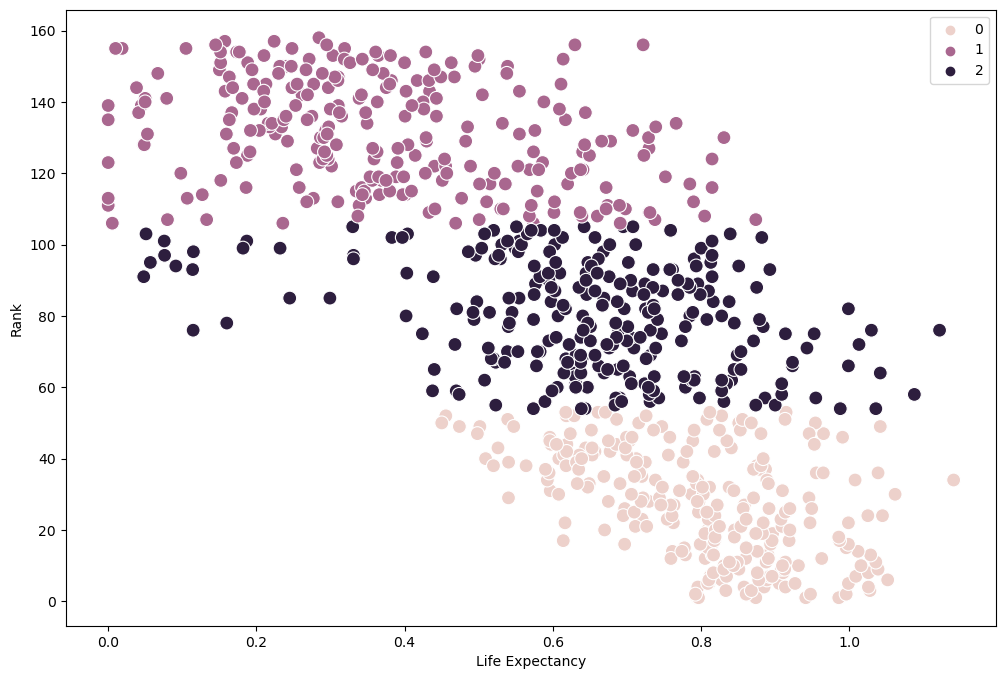

In [25]:
# Plot the clusters for the "Life Expectancy" and "Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Life Expectancy'], y=df_cluster['Rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Life Expectancy') 
plt.ylabel('Rank') 
plt.show()

In [27]:
df_cluster['cluster'] = ''
df_cluster.loc[df_cluster['clusters'] == 2, 'cluster'] = 'dark purple'
df_cluster.loc[df_cluster['clusters'] == 1, 'cluster'] = 'purple'
df_cluster.loc[df_cluster['clusters'] == 0, 'cluster'] = 'pink'

In [30]:
cluster_result = df_cluster.groupby('cluster').agg({'GDP':['mean', 'median'], 
                         'Life Expectancy':['mean', 'median'], 
                         'Freedom':['mean', 'median'],
                          'Corruption':['mean', 'median'],
                                  'Generosity':['mean','median']})

In [32]:
cluster_result

GDP           Life Expectancy             Freedom            \
                 mean    median            mean    median      mean    median   
cluster                                                                         
dark purple  0.953349  0.995769        0.650894  0.660785  0.388339  0.406665   
pink         1.262720  1.305000        0.801730  0.814870  0.512117  0.535000   
purple       0.520847  0.460380        0.378281  0.357000  0.329937  0.348588   

            Corruption           Generosity            
                  mean    median       mean    median  
cluster                                                
dark purple   0.088419  0.072743   0.190609  0.182425  
pink          0.184330  0.146096   0.245152  0.241800  
purple        0.102883  0.087000   0.219466  0.202000

The provided cluster summaries reveal distinct patterns in countries based on key indicators such as GDP, Life Expectancy, Freedom, Corruption, and Generosity. The Dark Purple Cluster stands out with higher mean and median values in GDP, Life Expectancy, and Freedom, suggesting a group of prosperous nations with better quality of life and greater personal freedoms. This cluster also exhibits lower levels of corruption and moderate generosity. In contrast, the Pink Cluster represents countries with lower overall prosperity, life expectancy, and freedom but shows a higher level of generosity. The Purple Cluster falls in between, portraying a middle ground with values for the mentioned indicators that lie between those of the Dark Purple and Pink Clusters.

These cluster insights offer valuable information for targeted decision-making and policy formulation. Policymakers could use this knowledge to tailor interventions to the specific needs of each cluster. For instance, the Dark Purple Cluster might benefit from policies aimed at sustaining economic growth and maintaining low corruption, while the Pink Cluster might require initiatives to improve overall well-being and encourage social generosity. The comparative analysis enabled by these clusters provides a nuanced understanding of regional similarities and differences, aiding in the development of more effective and targeted strategies for future socio-economic development, governance, and international cooperation.

In [33]:
# Export the Cleaned dataframe 

# Define the file path for exporting the DataFrame
export_path = "/Users/biancaskyehoney/Documents/World Happiness Report /02 Data /Prepared Data/cluster_result.csv"

# Export the DataFrame to a csv file
df.to_csv(export_path)